### Урок 3. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial
from IPython.display import Image

warnings.filterwarnings('ignore')

#### Задание 1
Даны значения зарплат из выборки выпускников: <br>
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

Решение: <br>

In [2]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
df_salary = pd.DataFrame(salary, columns = ['Salary'])

Среднее арифметическое:

In [3]:
mean_salary = df_salary['Salary'].sum() / df_salary['Salary'].count()
mean_salary

65.3

In [4]:
df_salary['Salary'].mean()

65.3

Среднее квадратичное отклонение:

In [5]:
std_salary = np.sqrt(((df_salary['Salary'] - df_salary['Salary'].mean()) ** 2).sum() / df_salary['Salary'].count())
std_salary

30.823854398825596

In [6]:
df_salary['Salary'].std(ddof=0)

30.823854398825596

 Смещенная оценка дисперсии:

In [7]:
salary_biased_variance = ((df_salary['Salary'] - df_salary['Salary'].mean()) ** 2).sum() / df_salary['Salary'].count()
salary_biased_variance

950.11

In [8]:
salary_biased_variance = df_salary['Salary'].var(ddof=0)
salary_biased_variance

950.11

Несмещенная оценка дисперсии:

In [9]:
salary_not_biased_variance = ((df_salary['Salary'] - df_salary['Salary'].mean())**2).sum() / (df_salary['Salary'].count() - 1)
salary_not_biased_variance

1000.1157894736842

In [10]:
salary_not_biased_variance = df_salary['Salary'].var(ddof=1)
salary_not_biased_variance

1000.1157894736842

#### Задание 2
Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. 
Найти выборсы в выборке, используя для этого "усы" из boxplot. 
В этой задаче можно использовать статистические функции.

Решение: <br>

In [11]:
df_salary['Salary'].quantile([0.25, 0.75])

0.25    42.0
0.75    81.0
Name: Salary, dtype: float64

In [12]:
interquartile_range = df_salary['Salary'].quantile(0.75) - df_salary['Salary'].quantile(0.25)
interquartile_range

39.0

<AxesSubplot:>

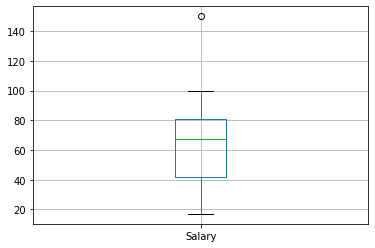

In [13]:
df_salary[['Salary']].boxplot()

In [14]:
q1 = df_salary['Salary'].quantile(0.25)
q3 = df_salary['Salary'].quantile(0.75)

interquartile_range = q3 - q1

boxplot_range = (q1 - 1.5 * interquartile_range, q3 + 1.5 * interquartile_range)
boxplot_range

(-16.5, 139.5)

In [15]:
outliers = df_salary.loc[(df_salary['Salary'] < boxplot_range[0]) | (df_salary['Salary'] > boxplot_range[1])]
outliers.shape[0]

1

#### Задание 3
В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе.

Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. 
Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. 

Студент сдал первую сессию. 

Какова вероятность, что он учится: 
a) на факультете A? 
б) на факультете B? 
в) на факультете C?

Решение: <br>

Всего студентов: <br>
$A = B = 1/2C$ <br>

Найдем вероятность выбрать студента: <br>
$1/4 + 1/4 + 1/2 = 1$

Вероятность того, что все студенты сдадут экзамен: <br>
$0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9 = 0.825$

Студент сдал первую сессию. Какова вероятность, что он учится: <br>
а) на факультете А

In [16]:
A = (0.25 * 0.8) / 0.825
A

0.24242424242424246

б) на факультете B

In [17]:
B = (0.25 * 0.7) / 0.825
B

0.21212121212121213

в) на факультете C

In [18]:
C = (0.5 * 0.9) / 0.825
C

0.5454545454545455